### *Required Libraries*

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, BayesianRidge,RANSACRegressor,HuberRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from xgboost import plot_importance
import pickle
import warnings
warnings.filterwarnings('ignore')

### *Loading Dataset*

In [39]:
data=pd.read_csv("House Data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


### *Data Preprocessing*

In [40]:
data.shape

(21613, 21)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [42]:
data.isna().any().sum()

1

In [43]:
data.fillna(0,inplace=True)

In [44]:
data.isna().any().sum()

0

### *Feature Creation*

In [45]:
date=[]
for i in data['date'].values:
    date.append(i[:4])

data['date']=date

In [46]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


### *Converting All Columns in Same Datatype*

In [47]:
for i in data.columns:
    data[i]=data[i].astype('float')

In [48]:
data.dtypes

id               float64
date             float64
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
zipcode          float64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

### *Creating A New Column for Age Of House*

In [49]:
data['age']=data['date']-data['yr_built']

In [50]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7.129301e+09,2014.0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,59.0
1,6.414100e+09,2014.0,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,63.0
2,5.631500e+09,2015.0,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,82.0
3,2.487201e+09,2014.0,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,49.0
4,1.954401e+09,2015.0,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,28.0


### *Calculating Year Of Renovation*

In [51]:
data['renov_age']=np.abs(data['yr_renovated']-data['yr_built'])
data['renov_age']=data['renov_age'].apply(lambda x :x if len(str(int(x)))==2 else 0.0)

In [52]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,renov_age
0,7.129301e+09,2014.0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,59.0,0.0
1,6.414100e+09,2014.0,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,63.0,40.0
2,5.631500e+09,2015.0,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,82.0,0.0
3,2.487201e+09,2014.0,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,49.0,0.0
4,1.954401e+09,2015.0,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,28.0,0.0


### *Removing Unwanted Column*

In [53]:
data.drop(['id','date','yr_built','yr_renovated'],axis=1,inplace=True)

### *Correlation Between Values*

In [54]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renov_age
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605416,0.323816,-0.053203,0.307003,0.021626,0.585379,0.082447,-0.053951,0.117200
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477479,0.303093,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.154324,0.016968
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685273,0.283770,-0.203866,0.024573,0.223042,0.568634,0.087175,-0.506407,0.045950
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876288,0.435043,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.318488,0.045653
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183510,0.015286,-0.129574,-0.085683,0.229521,0.144608,0.718557,-0.052990,-0.001141
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523867,-0.245705,-0.059121,0.049614,0.125419,0.279885,-0.011269,-0.489640,0.009475
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072076,0.080588,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.026093,0.066727
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167673,0.276947,0.084827,0.006157,-0.078400,0.280439,0.072575,0.053458,0.091207
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158195,0.174105,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,0.360665,-0.058816
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755781,0.168392,-0.184862,0.114084,0.198372,0.713202,0.119248,-0.447415,0.009081


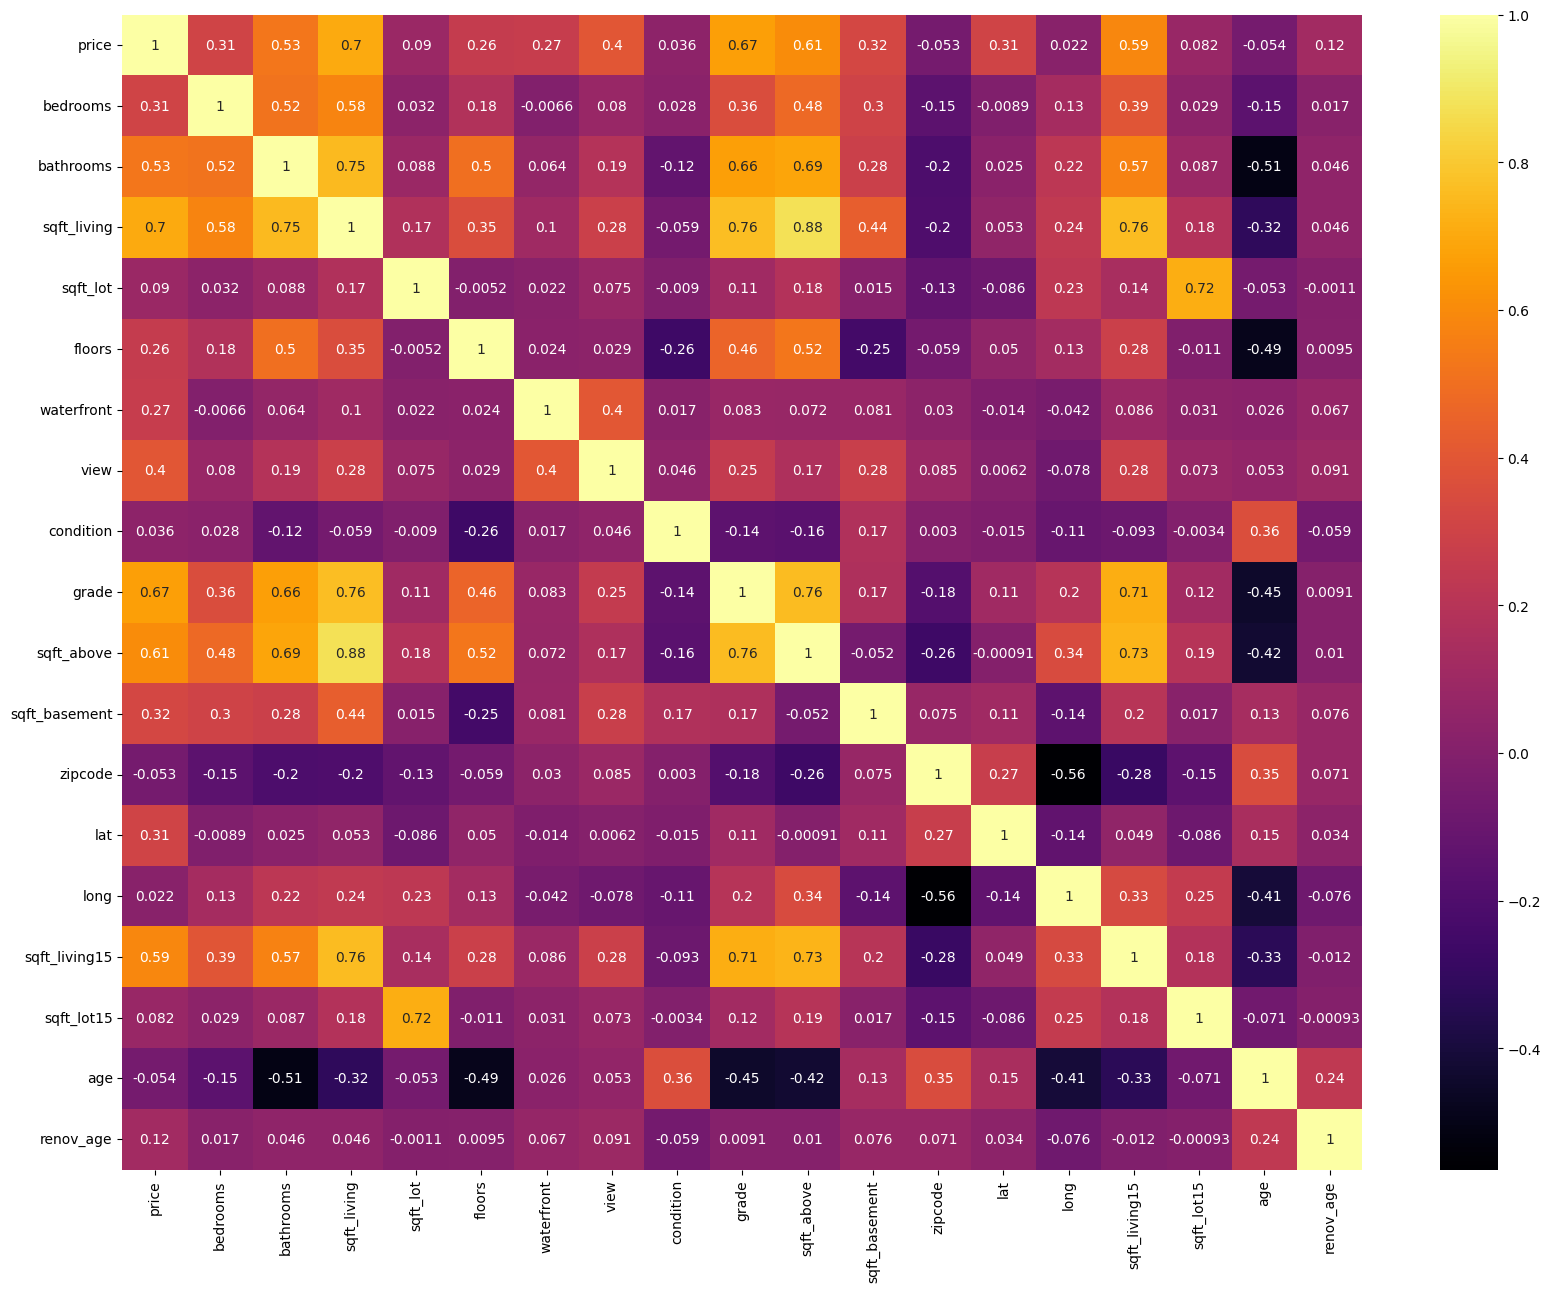

In [55]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,cmap='inferno')
plt.show()

In [56]:
corr_features =[]

for i , row in data.corr().iterrows():
    k=0 
    for j in range(len(row)):
        if i!= row.index[k]:
            if row.values[k] >=0.5:
                corr_features.append([i, row.index[k], row.values[k]])
        k+=1
corr_features

[['price', 'bathrooms', 0.5251375054139628],
 ['price', 'sqft_living', 0.7020350546118005],
 ['price', 'grade', 0.6674342560202353],
 ['price', 'sqft_above', 0.6054162591641183],
 ['price', 'sqft_living15', 0.5853789035795692],
 ['bedrooms', 'bathrooms', 0.5158836376158312],
 ['bedrooms', 'sqft_living', 0.5766706925022448],
 ['bathrooms', 'price', 0.5251375054139628],
 ['bathrooms', 'bedrooms', 0.5158836376158312],
 ['bathrooms', 'sqft_living', 0.7546652789673752],
 ['bathrooms', 'floors', 0.5006531725878688],
 ['bathrooms', 'grade', 0.6649825338780723],
 ['bathrooms', 'sqft_above', 0.6852729704767271],
 ['bathrooms', 'sqft_living15', 0.568634289578226],
 ['sqft_living', 'price', 0.7020350546118005],
 ['sqft_living', 'bedrooms', 0.5766706925022448],
 ['sqft_living', 'bathrooms', 0.7546652789673752],
 ['sqft_living', 'grade', 0.7627044764584776],
 ['sqft_living', 'sqft_above', 0.8762879508115581],
 ['sqft_living', 'sqft_living15', 0.7564202590172237],
 ['sqft_lot', 'sqft_lot15', 0.71855

### *Removing Highly Correlated Values*

In [57]:
feature=[]
for i in corr_features:
    if i[2]>=0.8:
        feature.append(i[0])
        feature.append(i[1])
feature

['sqft_living', 'sqft_above', 'sqft_above', 'sqft_living']

In [58]:
data.drop(list(set(feature)),axis=1,inplace=True) #set contains only unique item

### *Outlier Detection*

### *1. Creating Boxplot to see the outliers in the price variable*

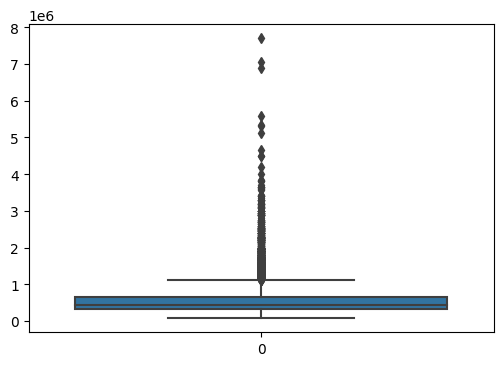

In [59]:
plt.figure(figsize=(6,4))
sns.boxplot(data['price'])
plt.show()

### *2. By Using Interquartile Range*

In [60]:
def calc_interquartile(data, column):
    global lower, upper
    
    #calculating the first and third quartile
    first_quartile, third_quartile = np.percentile(data[column], 25), np.percentile(data[column], 75)
    
    #calculate the interquartilerange
    iqr = third_quartile - first_quartile
    
    # outlier cutoff (1.5 is a generally taken as a threshold)
    cutoff = iqr*1.5
    
    #calculate the lower and upper limits
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    
    #remove the outliers from the columns
    upper_outliers = data[data[column] > upper]
    lower_outliers = data[data[column] < lower]
    print('Lower outliers', lower_outliers.shape[0])
    print('Upper outliers', upper_outliers.shape[0])
    return print('total outliers', upper_outliers.shape[0] + lower_outliers.shape[0])

Lower outliers 0
Upper outliers 1146
total outliers 1146
1129575.0 -162625.0


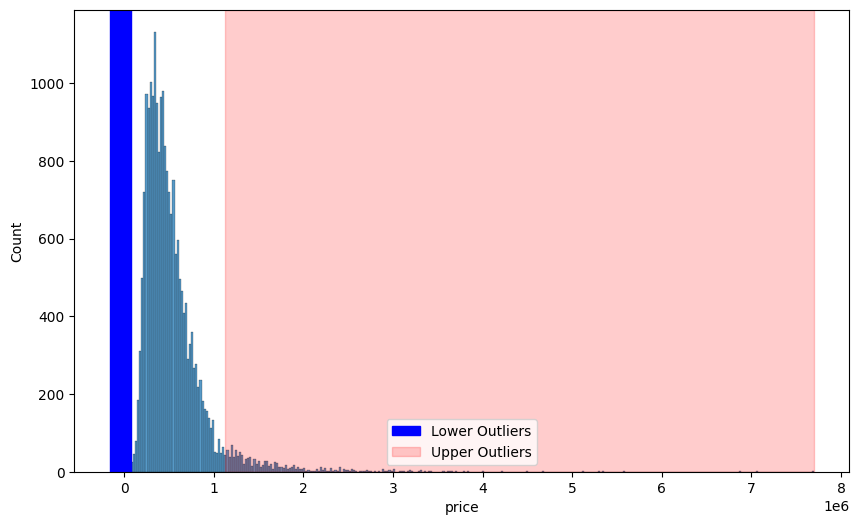

In [61]:
calc_interquartile(data, 'price')
plt.figure(figsize = (10,6))
sns.histplot(data['price'], kde=False)
print(upper, lower)
plt.axvspan(xmin = lower,xmax= data['price'].min(),alpha=1, color='blue', label='Lower Outliers')
plt.axvspan(xmin = upper,xmax= data['price'].max(),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()

### *3. By Using zscore method*

In [62]:
def z_score(data, column):
    #creating global variables for plotting the graph for better demonstration
    global zscore, outlier
    #creating lists to store zscore and outliers 
    zscore = []
    outlier =[]
    # for zscore generally taken thresholds are 2.5, 3 or 3.5 hence i took 3
    threshold = 3
    # calculating the mean of the passed column
    mean = np.mean(data[column])
    # calculating the standard deviation of the passed column
    std = np.std(data[column])
    for i in data[column]:
        z = (i-mean)/std
        zscore.append(z)
        #if the zscore is greater than threshold = 3 that means it is an outlier
        if np.abs(z) > threshold:
            outlier.append(i)
    return print('total outliers', len(outlier))

total outliers 406
1129575.0 -162625.0


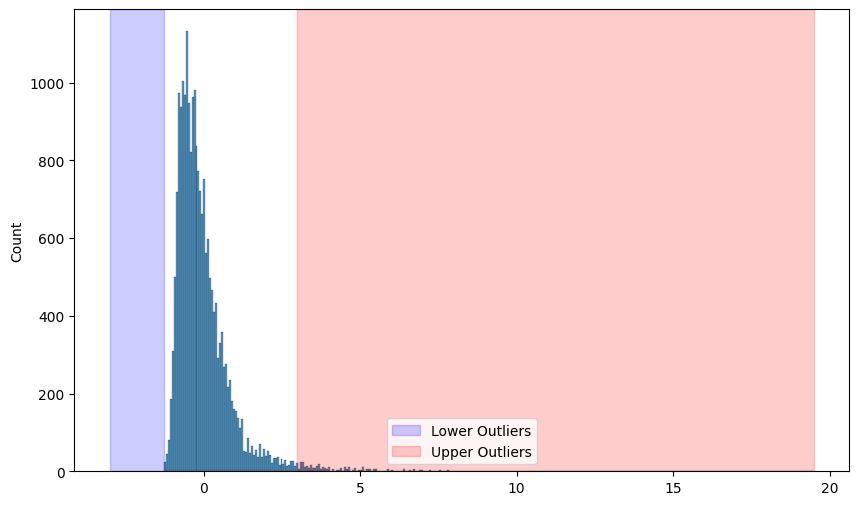

In [63]:
z_score(data, 'price')
plt.figure(figsize = (10,6))
sns.histplot(zscore, kde=False)
print(upper, lower)
plt.axvspan(xmin = -3 ,xmax= min(zscore),alpha=0.2, color='blue', label='Lower Outliers')
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()

### *Removing Outliers*

In [64]:
dj=[]
for i in data.price:
    if i in set(outlier):
        dj.append(0.0)
    else:
        dj.append(i)
        
data['P'] = dj

x = data.drop(data[data['P'] == 0.0].index) 
x.shape

(21207, 18)

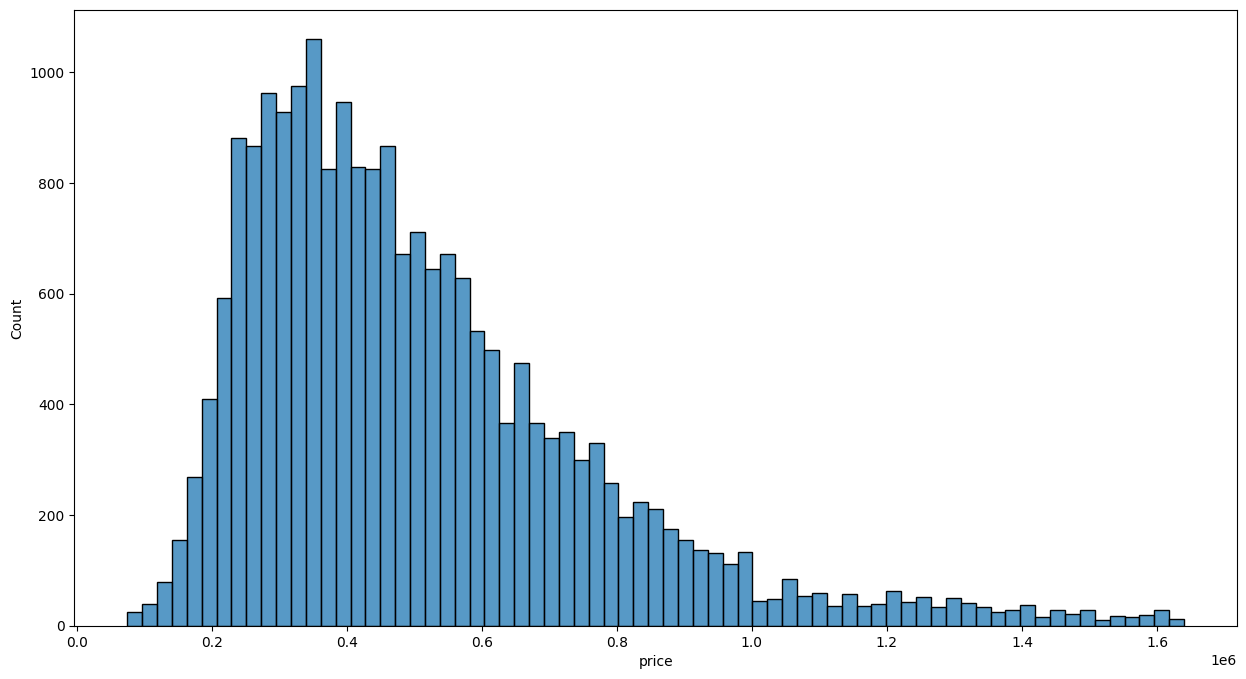

In [65]:
plt.figure(figsize = (15,8))
sns.histplot(x['price'], kde=False)
plt.show()

In [66]:
iso=IsolationForest()
outlier=iso.fit_predict(data)
outlier

array([1, 1, 1, ..., 1, 1, 1])

In [67]:
#mask variable contains all the outliers
mask = outlier == -1  
#task variable contains all the non-outliers data
task = outlier == 1
#creating dataframe containing outliers
data_1 = data[mask]
#creating dataframe containing non-outliers
data_2 = data[task]

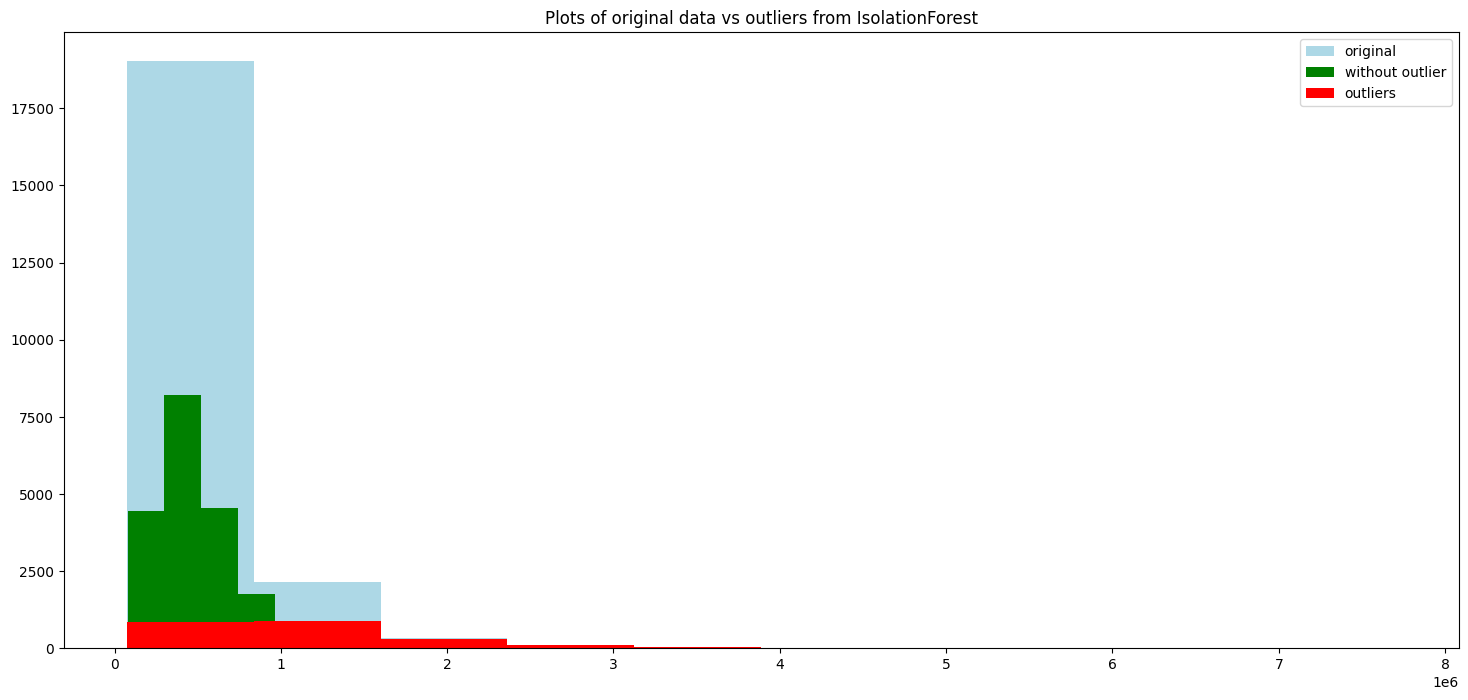

In [68]:
#plotting graph to show the original data, outliers and non-outliers 
plt.figure(figsize=(18, 8))
plt.title('Plots of original data vs outliers from IsolationForest')
plt.hist(data['price'], label= 'original', color='lightblue')
plt.hist(data_2['price'], label='without outlier', color='green')
plt.hist(data_1['price'], label='outliers', color='red')
plt.legend()
plt.show()

### *Model Building*

In [69]:
X=x.drop(['price','P'],axis=1)
Y=x['price']

In [70]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

In [71]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [72]:
pred=lr_model.predict(x_test)
r2_score(y_test,pred)

0.6997002169578366

### *Creating Pipeline For All Model*

In [73]:
sc = ('Scaler', StandardScaler())
est =[]
est.append(('LinearRegression', Pipeline([sc, ('LinearRegression', LinearRegression())])))
est.append(('Ridge', Pipeline([sc, ('Ridge', Ridge())])))
est.append(('Lasso', Pipeline([sc, ('Lasso', Lasso())])))
est.append(('BayesianRidge', Pipeline([sc, ('BayesianRidge', BayesianRidge())])))
est.append(('ElasticNet', Pipeline([sc,('Elastic', ElasticNet())])))
est.append(('SGD', Pipeline([sc,('SGD', SGDRegressor())])))
est.append(('Huber', Pipeline([sc,('Huber', HuberRegressor())])))
est.append(('RANSAC', Pipeline([sc,('RANSAC', RANSACRegressor())])))
est.append(('GradientBoosting', Pipeline([sc,('GradientBoosting',GradientBoostingRegressor())])))
est.append(('AdaBoost', Pipeline([sc, ('AdaBoost', AdaBoostRegressor())])))
est.append(('ExtraTree', Pipeline([sc,('ExtraTrees', ExtraTreesRegressor())])))
est.append(('RandomForest', Pipeline([sc,('RandomForest', RandomForestRegressor())]))) 
est.append(('Bagging', Pipeline([sc,('Bagging', BaggingRegressor())])))
est.append(('KNeighbors', Pipeline([sc,('KNeighbors', KNeighborsRegressor())])))
est.append(('DecisionTree', Pipeline([sc,('DecisionTree', DecisionTreeRegressor())])))
est.append(('XGB', Pipeline([sc,('XGB', XGBRegressor())])))

In [74]:
seed = 4
splits = 7
score = 'r2'
models_score =[]
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], x_train, y_train, cv=kfold, scoring=score)
    models_score.append({i[0] : '{}'.format(results.mean())})

In [75]:
models_score

[{'LinearRegression': '0.6949623277084518'},
 {'Ridge': '0.6949624675751439'},
 {'Lasso': '0.6949624241398802'},
 {'BayesianRidge': '0.6949632088762919'},
 {'ElasticNet': '0.6498126908196857'},
 {'SGD': '0.6943275727557702'},
 {'Huber': '0.6867756991481381'},
 {'RANSAC': '0.25581927120927095'},
 {'GradientBoosting': '0.8348568341904032'},
 {'AdaBoost': '0.5755710700278064'},
 {'ExtraTree': '0.8492798425576648'},
 {'RandomForest': '0.8505388137082196'},
 {'Bagging': '0.8344952486175317'},
 {'KNeighbors': '0.7644085715976143'},
 {'DecisionTree': '0.7027778703628224'},
 {'XGB': '0.8608790943521237'}]

### *Hyperparameter Tuning*

In [76]:
est =[]
est.append(('XGB', Pipeline([sc,('XGB', XGBRegressor())])))

best = []

parameters = {
              
              'XGB': {'XGB__learning_rate': [0.1,0.2,0.3,0.4],
                         
                         'XGB__max_depth': [4,6,8],
                      'XGB__n_estimators': [100,500,1000,1500]}
             }

for i in est:
    kfold = KFold(n_splits=5, random_state=seed, shuffle=True)
    grid = GridSearchCV(estimator=i[1], param_grid = parameters[i[0]], cv = kfold, n_jobs=-1)
    grid.fit(x_train, y_train)
    best.append((i[0], grid.best_score_,  grid.best_params_))

### *Implementing model with best parameter*

In [77]:
xgb = XGBRegressor(learning_rate=0.1, max_depth=4, n_estimators=1000)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
xgb.score(x_test,y_test)

0.8812058097461277

### *Feature Selection*

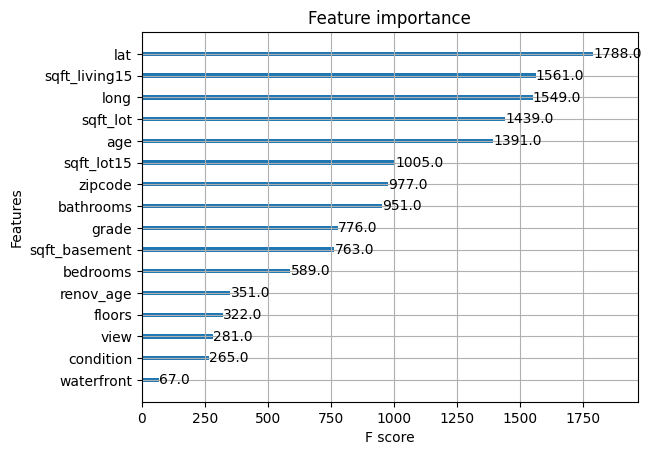

In [79]:
plot_importance(xgb)
plt.show()

In [80]:
SelectedFeatures = x[['sqft_lot','sqft_living15','age','zipcode','bathrooms','bedrooms','renov_age','sqft_basement','grade']]
SelectedFeatures

,sqft_lot,sqft_living15,age,zipcode,bathrooms,bedrooms,renov_age,sqft_basement,grade
0,5650.0,1340.0,59.0,98178.0,1.00,3.0,0.0,0.0,7.0
1,7242.0,1690.0,63.0,98125.0,2.25,3.0,40.0,400.0,7.0
2,10000.0,2720.0,82.0,98028.0,1.00,2.0,0.0,0.0,6.0
3,5000.0,1360.0,49.0,98136.0,3.00,4.0,0.0,910.0,7.0
4,8080.0,1800.0,28.0,98074.0,2.00,3.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...
21608,1131.0,1530.0,5.0,98103.0,2.50,3.0,0.0,0.0,8.0
21609,5813.0,1830.0,1.0,98146.0,2.50,4.0,0.0,0.0,8.0
21610,1350.0,1020.0,5.0,98144.0,0.75,2.0,0.0,0.0,7.0
21611,2388.0,1410.0,11.0,98027.0,2.50,3.0,0.0,0.0,8.0


### *Model Training*

In [81]:
x_train, x_test, y_train, y_test = train_test_split(SelectedFeatures, Y, test_size = 0.3, random_state=42)

#implementing it with best parameters
xgb = XGBRegressor(learning_rate=0.1, max_depth=4, n_estimators=1000)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
xgb.score(x_test,y_test)

0.8359854149907505

### *Saving Our Model*

In [83]:
pickle.dump(xgb, open('model.pkl', 'wb'))